In [1]:
%load_ext autoreload
%autoreload 2

import nolearn.lasagne.visualize 

import sys
sys.path.append('/home/d/Projects/gp')
import gp

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
from stats import Stats

mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


Loaded /home/d/patches//cylinder2_rgb/ in 0.00172519683838 seconds.

Precision/Recall:
             precision    recall  f1-score   support

          0       0.96      0.93      0.95      8780
          1       0.94      0.96      0.95      8780

avg / total       0.95      0.95      0.95     17560

Test Accuracy: 0.94589977221
Accuracy Score: 0.94589977221


/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


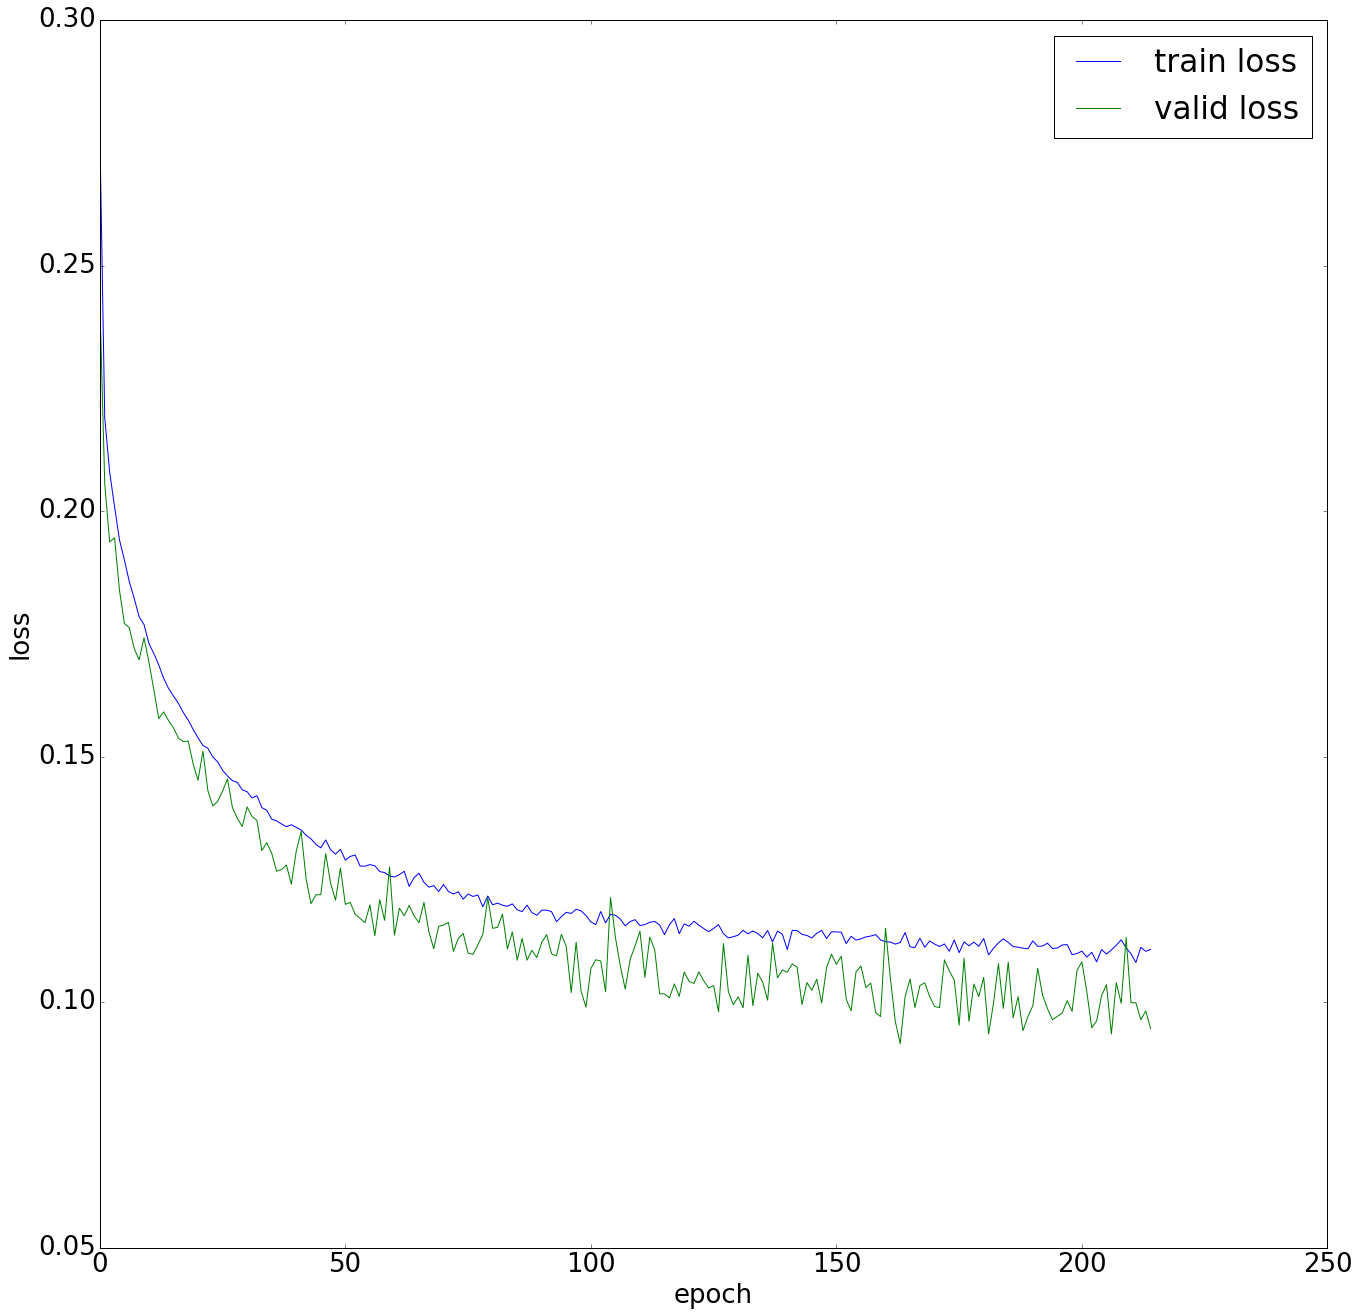

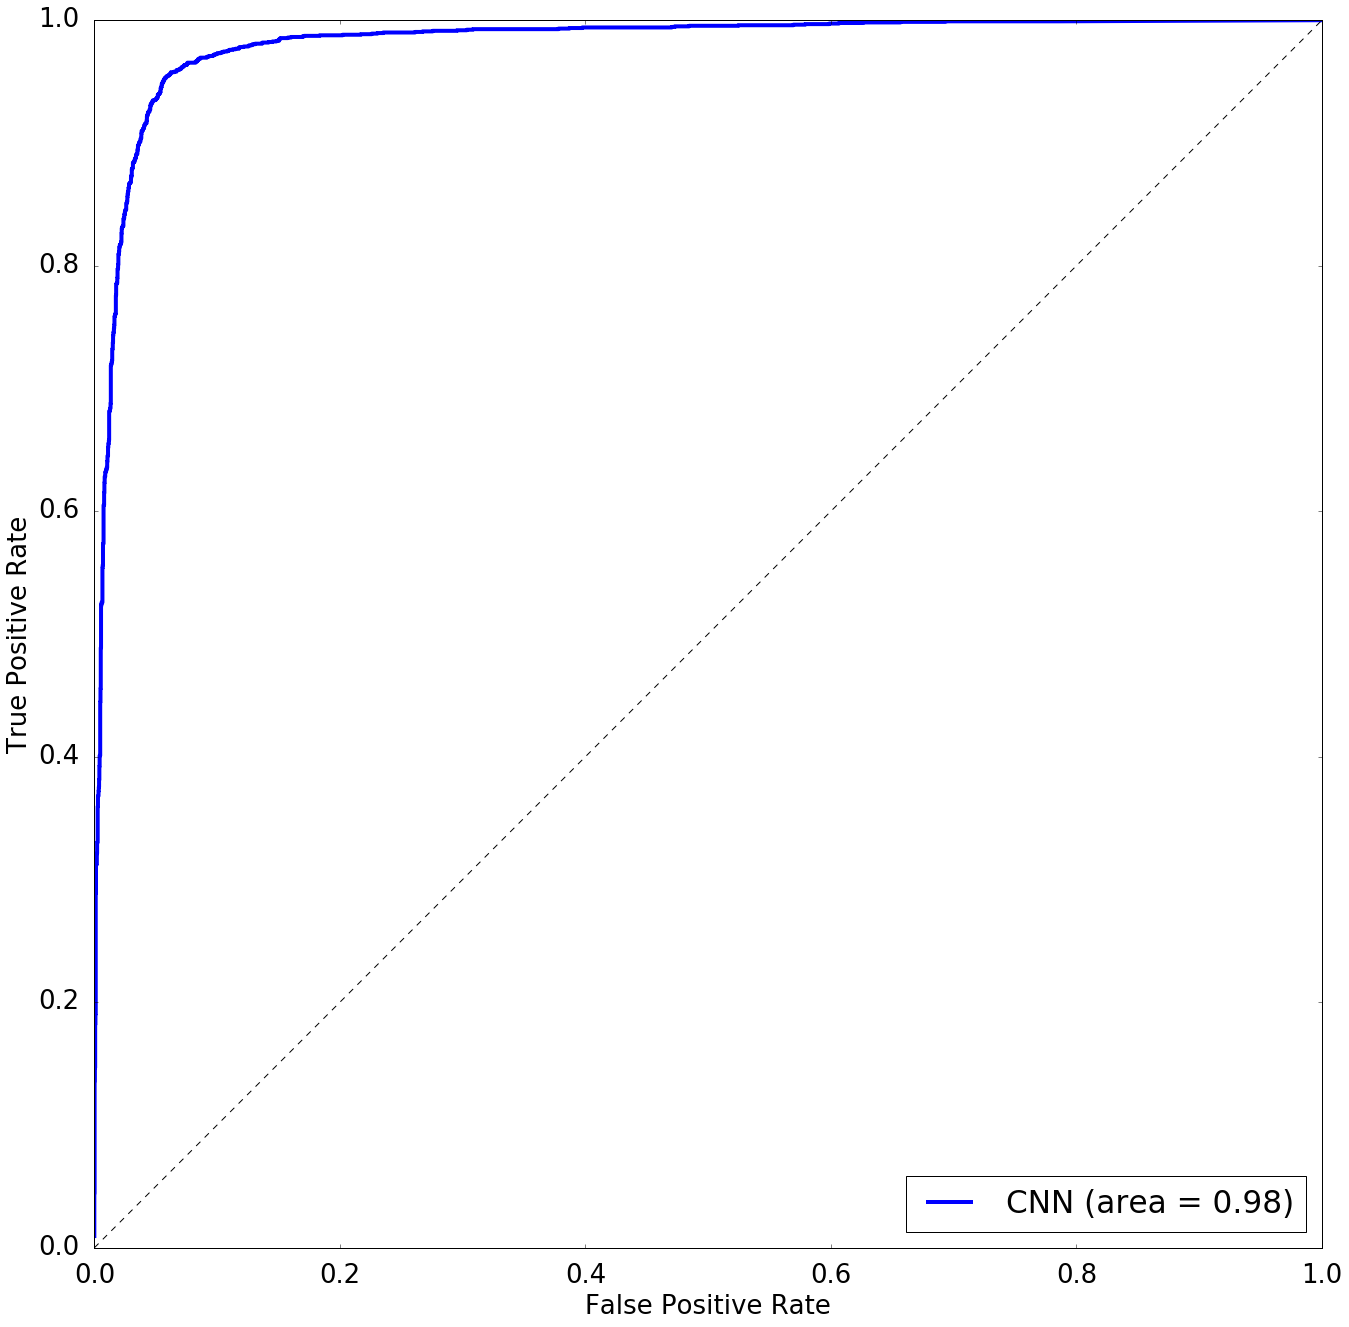

In [3]:
cnn1 = '/home/d/nets/MergeNetDropout_cylinder1_border_overlap_dropout_usevars/net.p'
cnn2 = '/home/d/nets/MergeNetDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'
cnn3 = '/home/d/nets/MergeNetThreeLegDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'
cnn4 = '/home/d/nets/MergeNetDropout_cylinder1_border_overlap_dropout_usevars_LargerDropout/net.p'
cnn5 = '/home/d/nets/MergeNetDropout_cylinder1_larger_border_overlap_dropout_usevars_LargerDropout/net.p'
cnn6 = '/home/d/nets/MergeNetThreeLeg_LargerDropout/net.p'
cnn7 = '/home/d/nets/RGBANet_cylinder1_rgba_border_overlap_dropout_usevars/net.p'
cnn8 = '/home/d/nets/RGBANet_cylinder1_rgba_larger_border_overlap_dropout_usevars/net.p'
cnn9 = '/home/d/nets/RGBNet_cylinder1_rgba_larger_border_overlap_dropout_usevars/net.p'
cnn10 = '/home/d/nets/RGBNetDropout_cylinder1_rgba_larger_border_overlap_dropout2_usevars/net.p'
cnn11 = '/home/d/nets/RGBANetDropout_cylinder1_rgba_larger_border_overlap_dropout2_usevars/net.p'
cnn12 = '/home/d/nets/RGBANetDropout_cylinder1_rgba_border_overlap_dropout2_usevars/net.p'
cnn13 = '/home/d/nets/MergeNetDropout_cylinder2_larger_border_overlap_NEWDATA/net.p'
cnn14 = '/home/d/Projects/gp/nets/RGBPlus_FULL.p'

cnn = Stats.load_cnn(cnn14, 'RGBPlus')

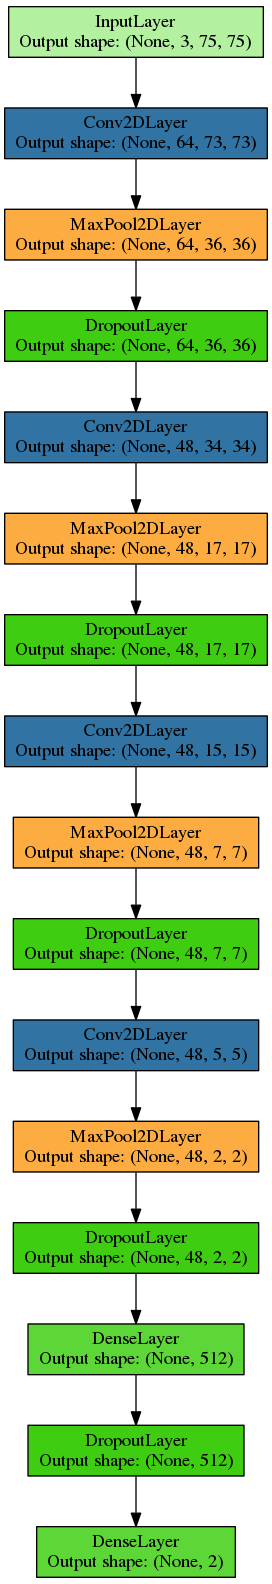

In [4]:
nolearn.lasagne.visualize.draw_to_notebook(cnn)

Finding Top 5 merge errors..


IndexError: list index out of range

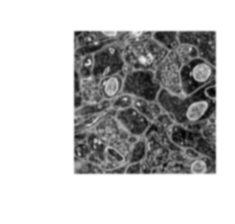

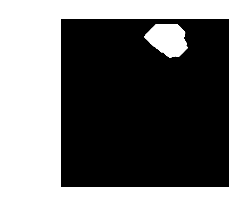

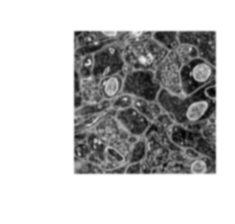

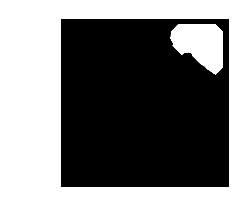

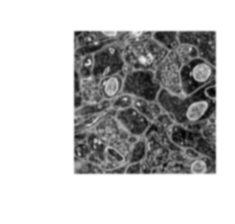

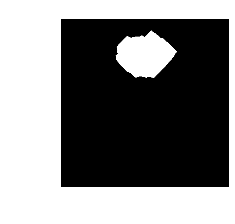

In [7]:
Stats.run_dojo_xp(cnn)

Original median VI 0.379410649496
Loading cylinder bigM from file..

Loading merge errors p < .05 and split errors p > .95 from file..
   Mean VI improvement 0.041472421143
   Median VI improvement 0.0235039724767

Loading merge errors p < .01 and split errors p > .99 from file..
   Mean VI improvement 0.0308815608684
   Median VI improvement 0.0218376399118

Loading split errors p >= .0 from file..
   Mean VI improvement -2.89881670844
   Median VI improvement -2.96778073752

Correcting split errors by simulated user (er=0)
   Mean VI improvement 0.081602089592
   Median VI improvement 0.078013907317


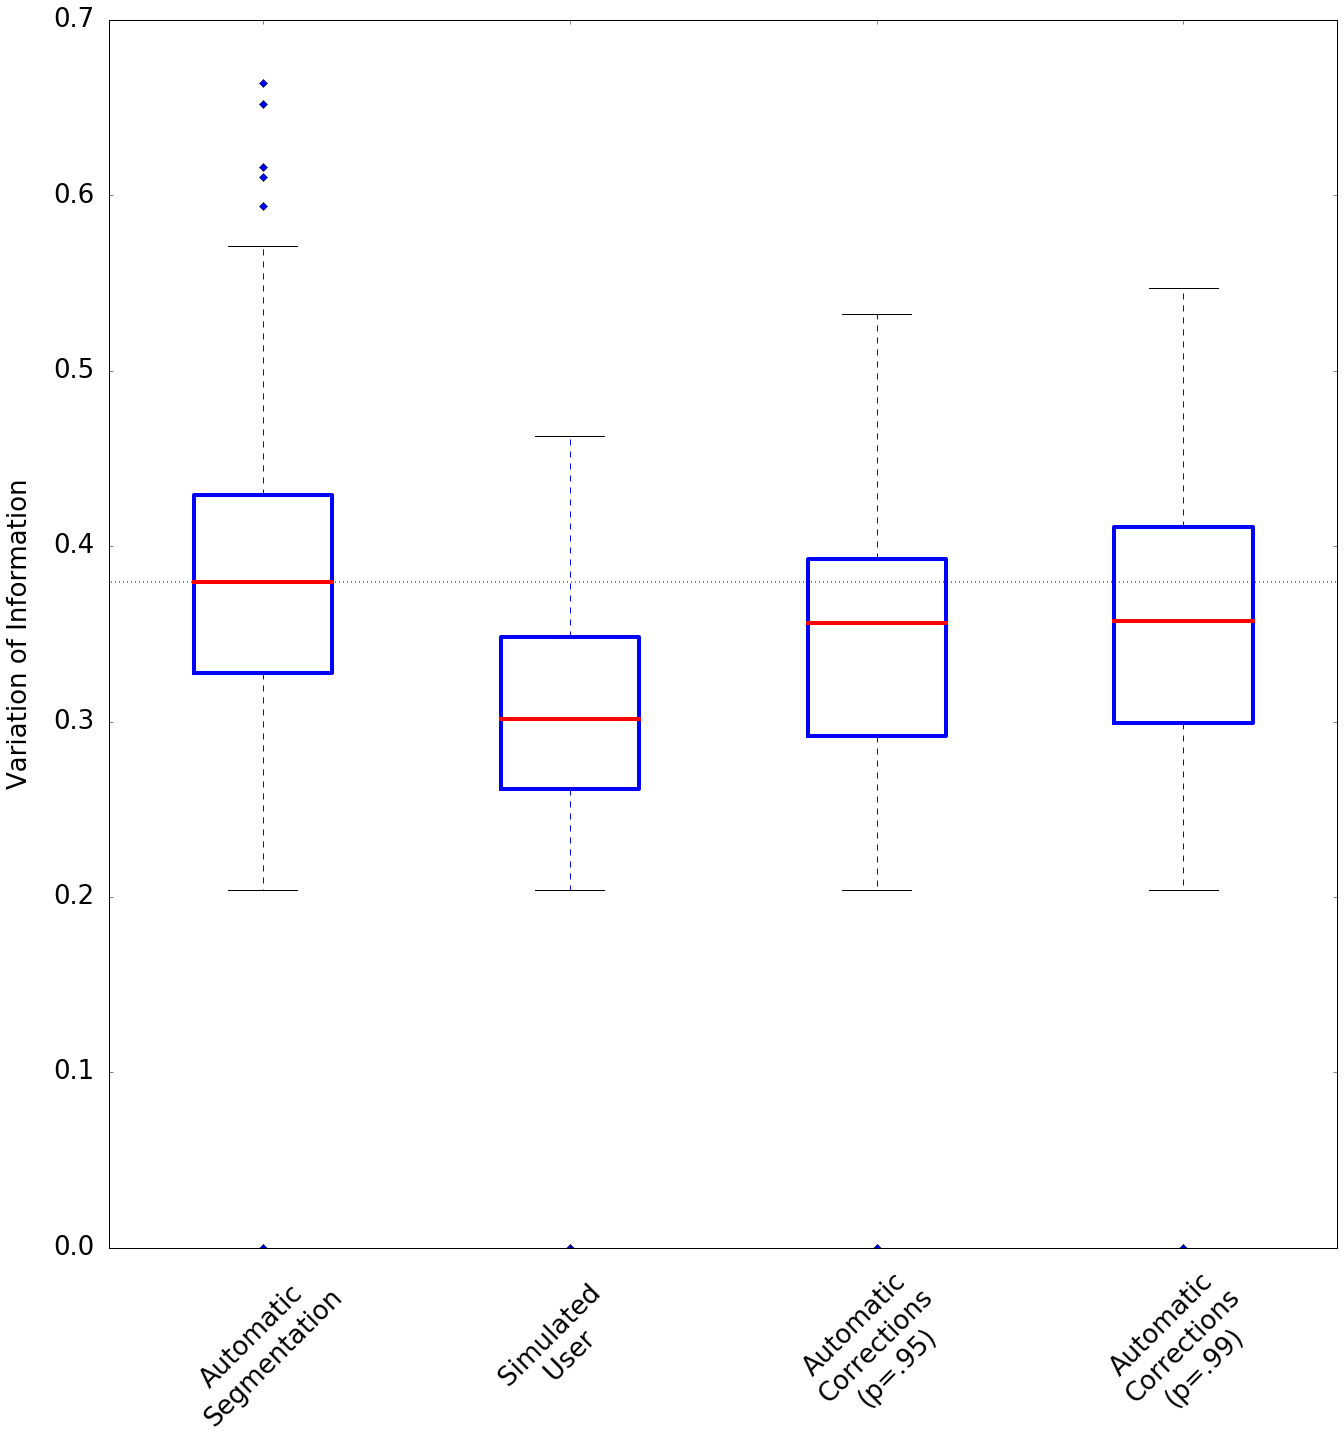

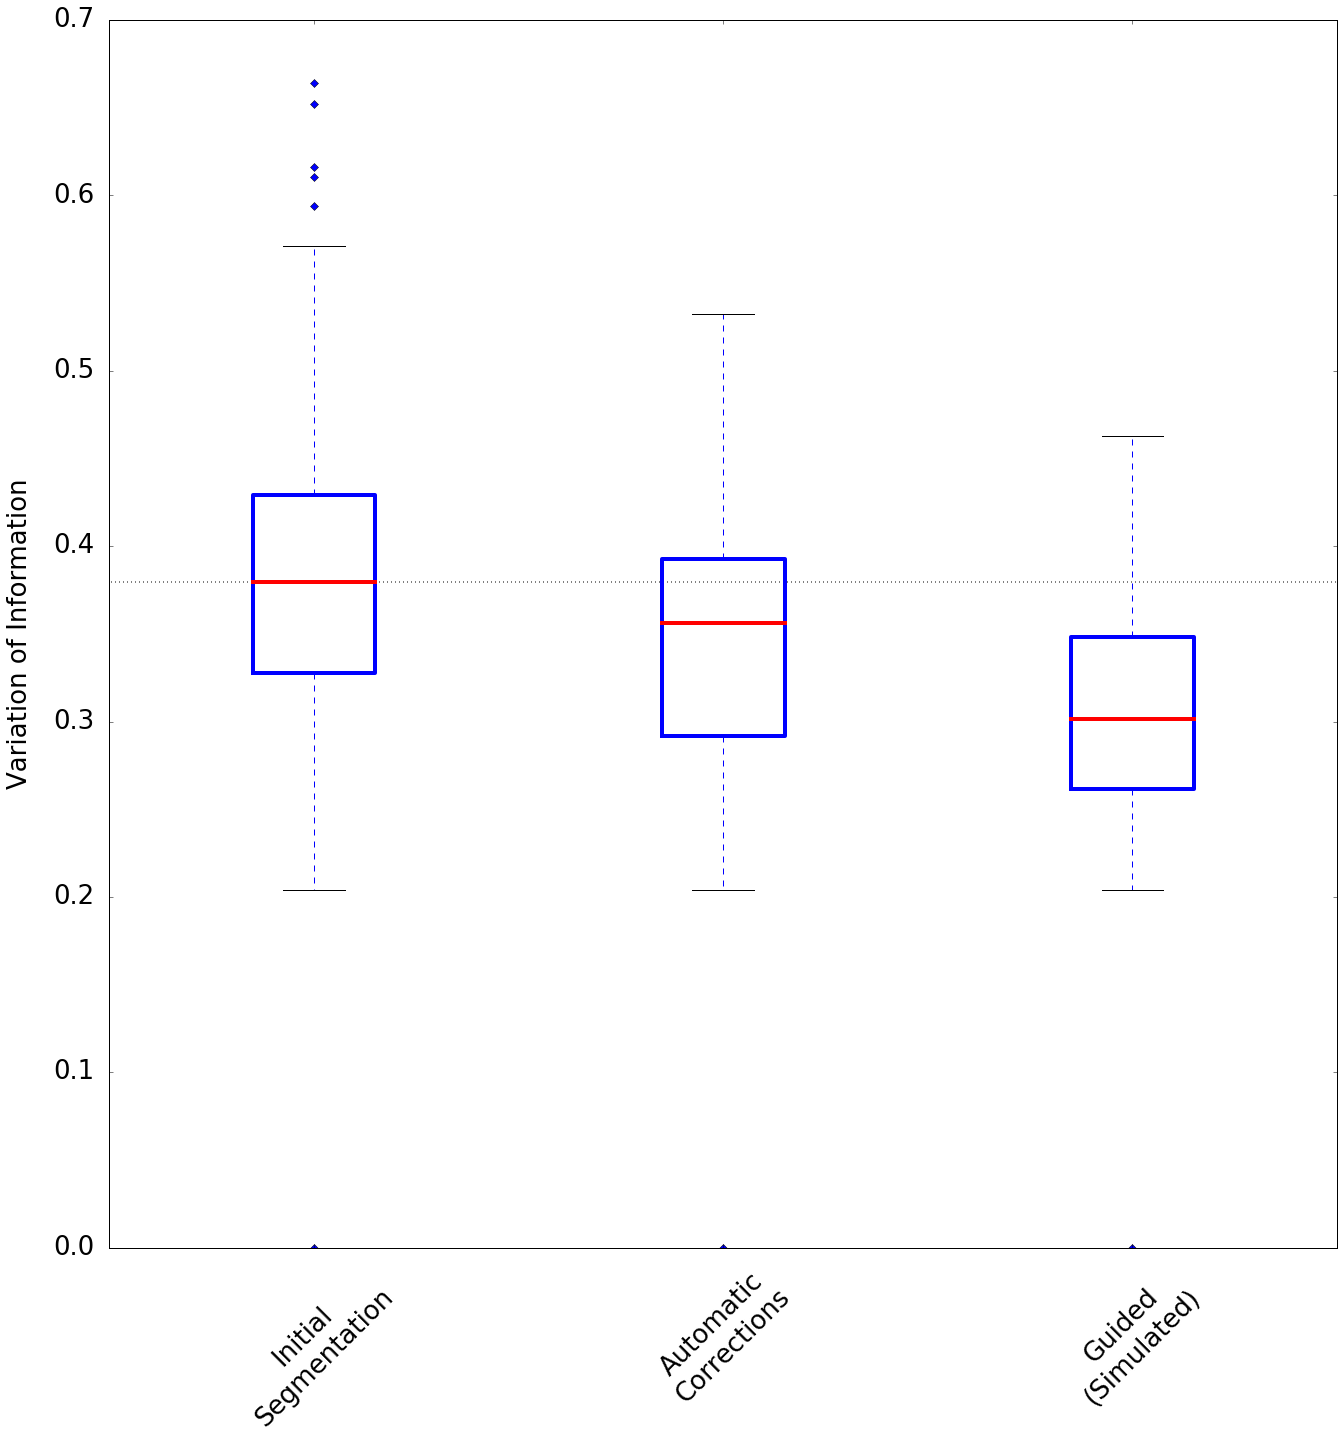

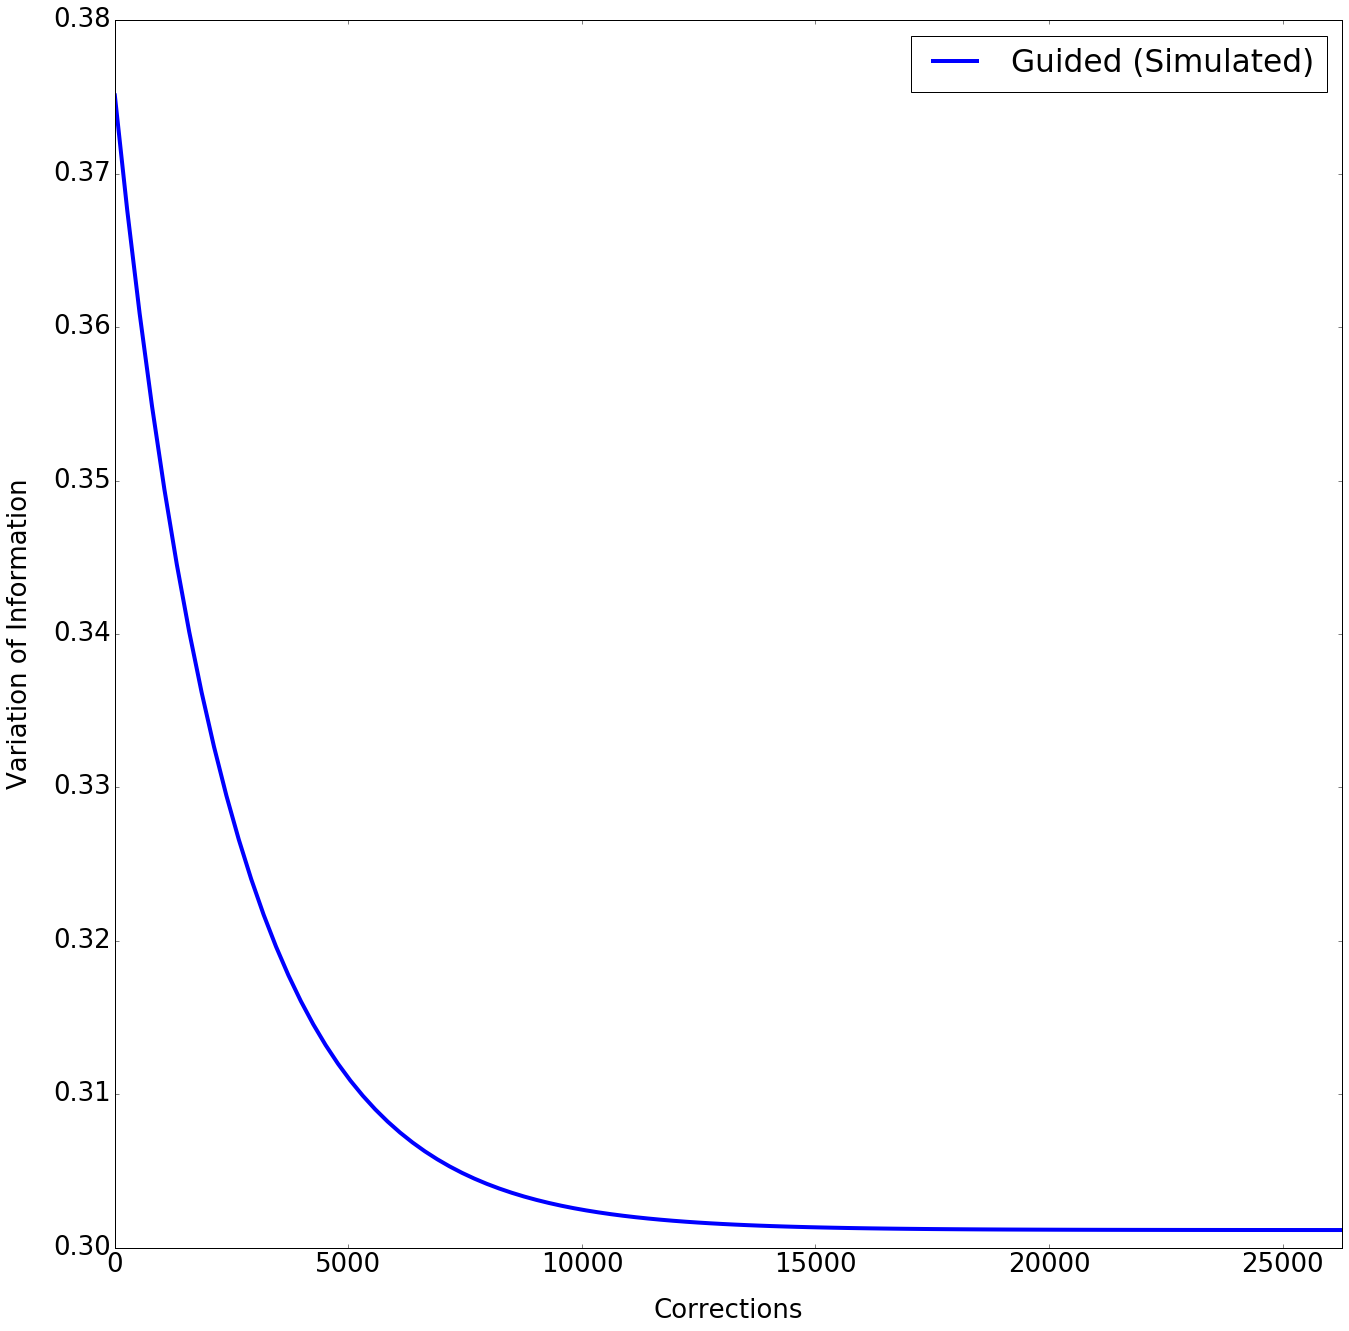

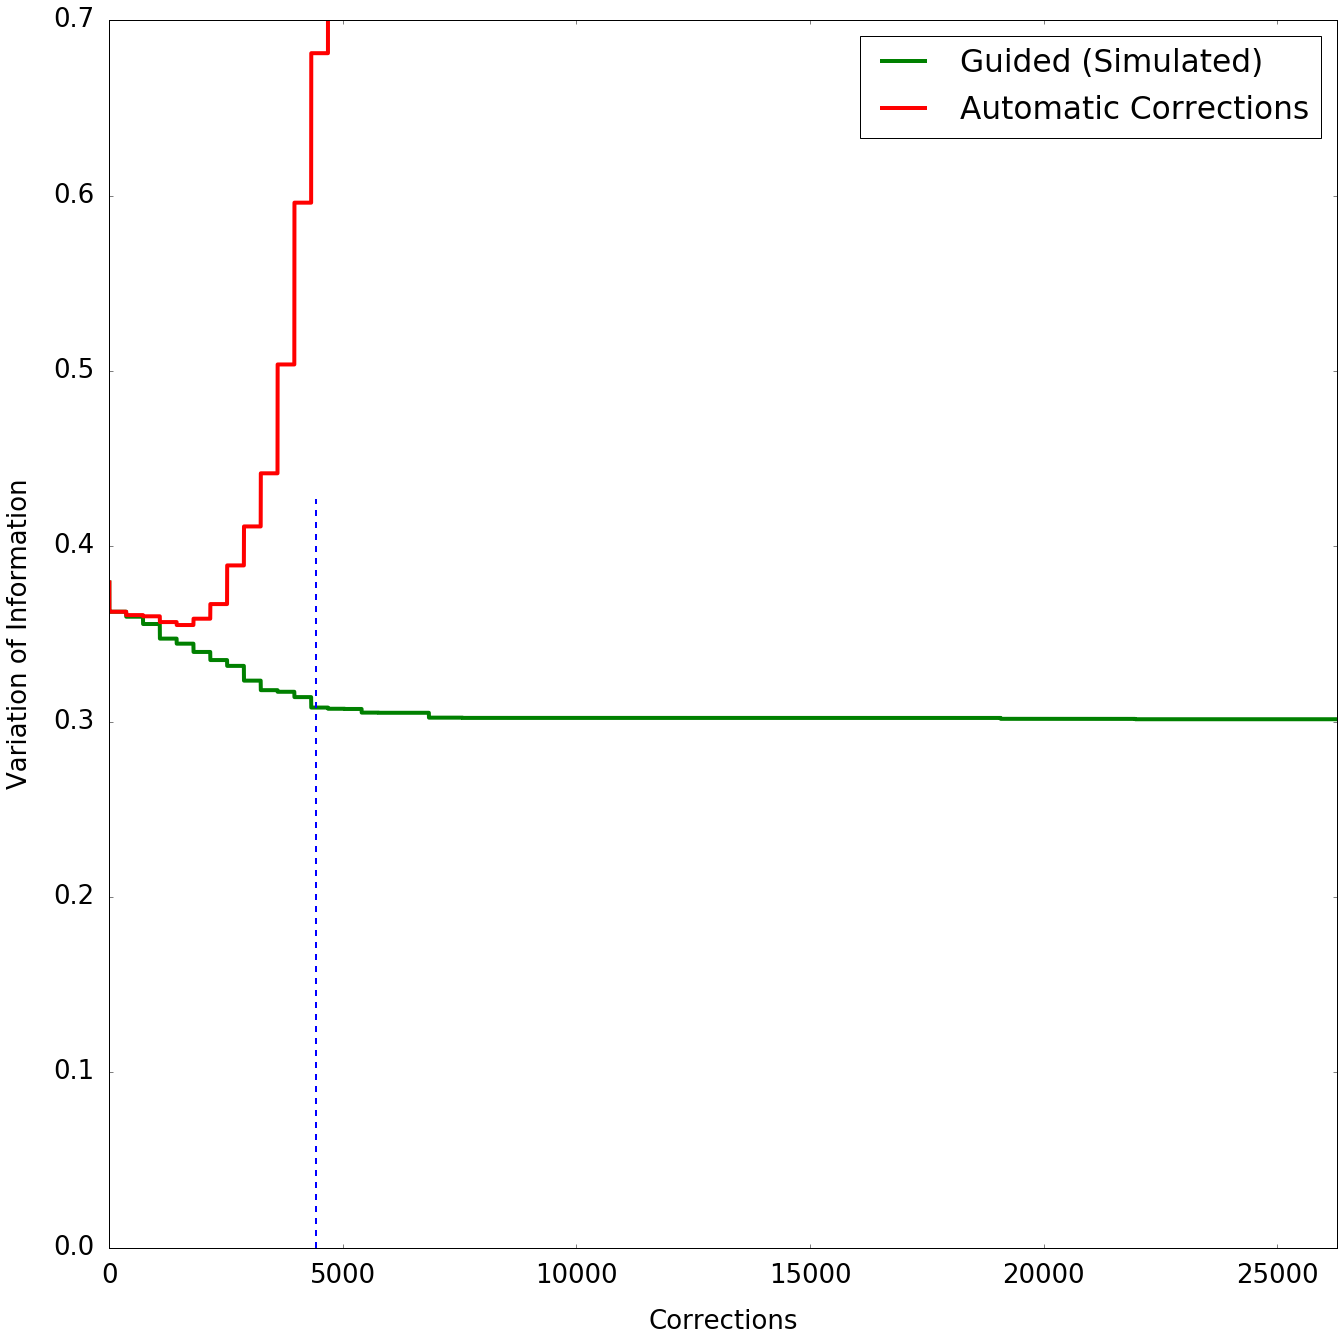

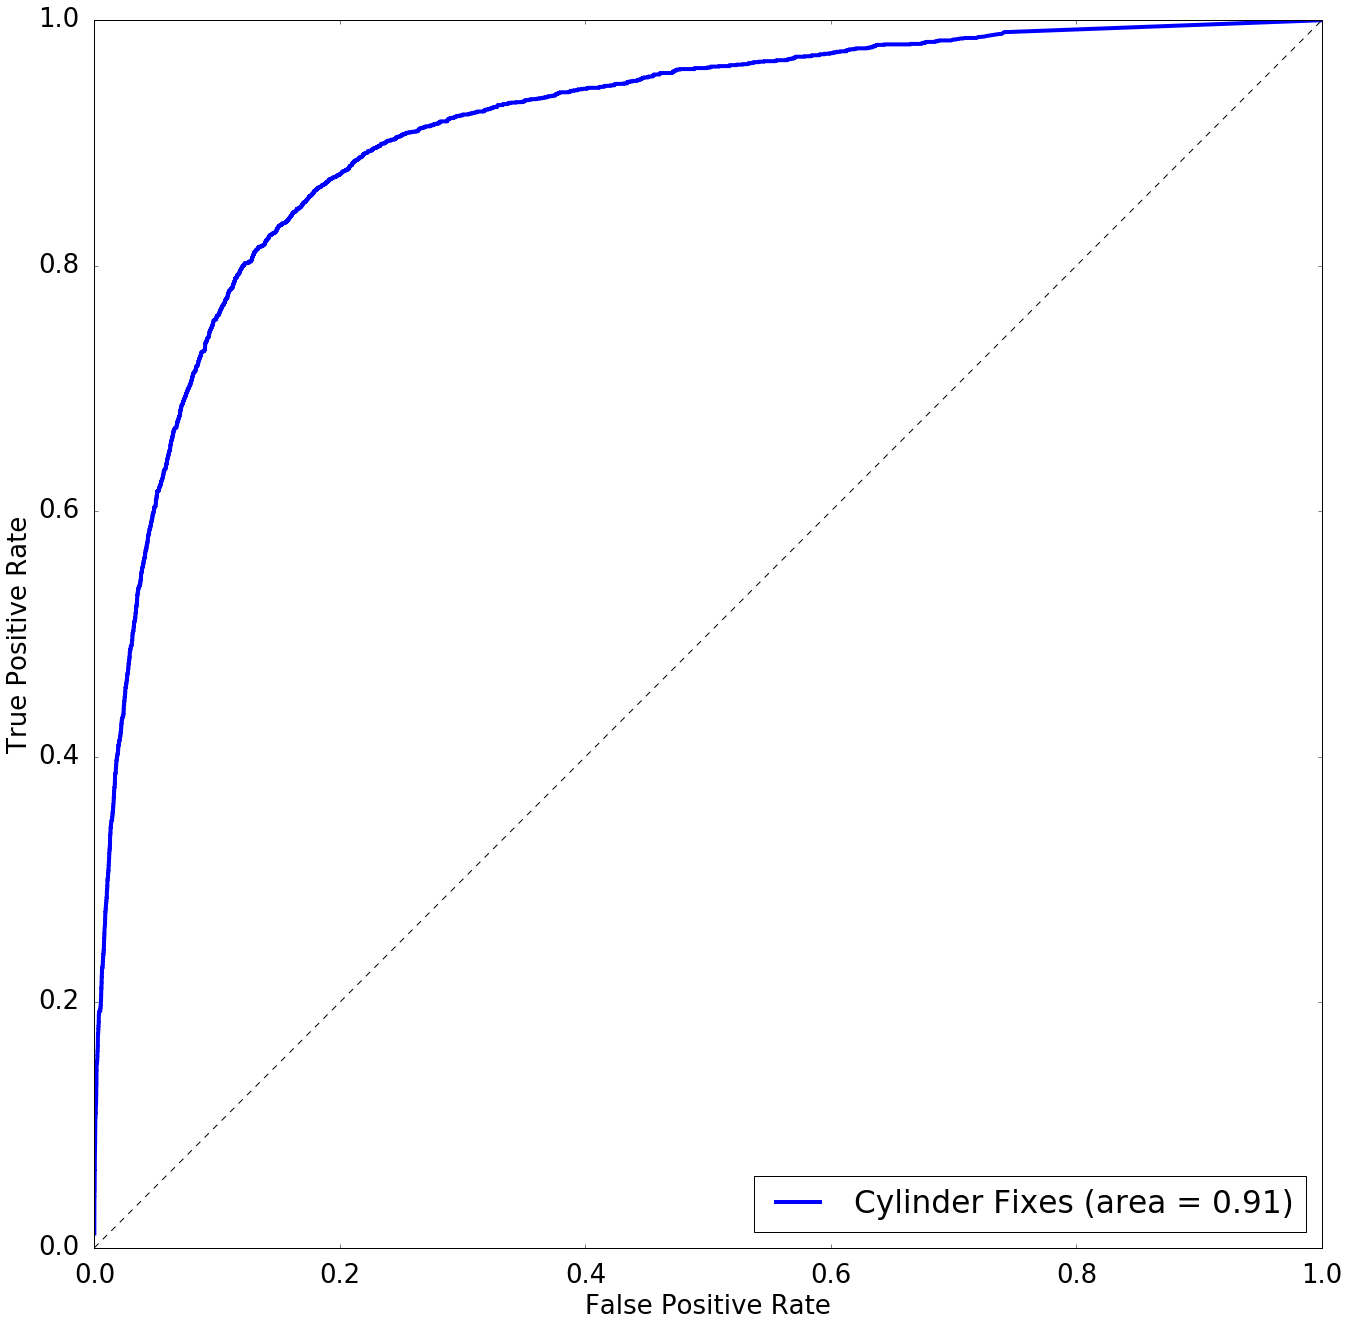

In [5]:
Stats.run_cylinder_new_xp(cnn)

In [38]:
import mlproof as mlp
import numpy as np

In [96]:
image, prob, mask, gold, rhoana = mlp.Util.read_section('/home/d/data/cylinderNEW/', 250, verbose=False)

In [97]:
prob = 255.-prob

In [98]:
patches = mlp.Patch.patchify(image, prob, rhoana, oversampling=False, max=10)


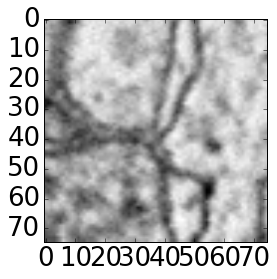

In [47]:
imshow(patches[7]['image'], cmap='gray')

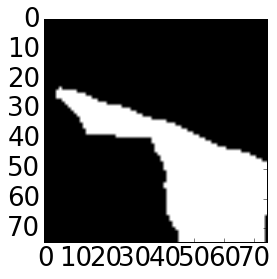

In [46]:
imshow(patches[7]['merged_array'], cmap='gray')

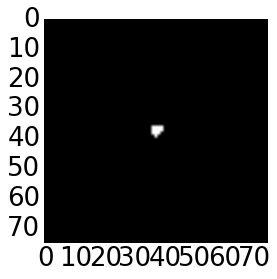

In [45]:
imshow(patches[7]['border_overlap'], cmap='gray')

array([[  9.99936342e-01,   6.36016703e-05]], dtype=float32)

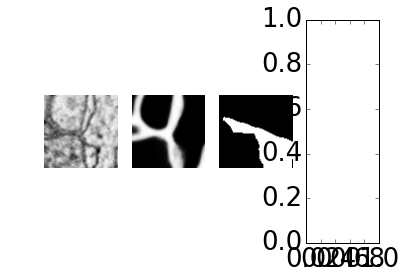

In [100]:
key = 7
correct_split1 = np.array([patches[key]['image'], patches[key]['prob'], patches[key]['merged_array']])
bbox = patches[key]['bbox']
gp.Util.view_rgba(correct_split1)
cnn.predict_proba(correct_split1.reshape(1,3,75,75))


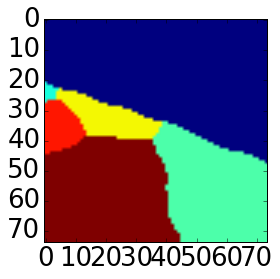

In [64]:
imshow(rhoana[bbox[0]:bbox[1], bbox[2]:bbox[3]])

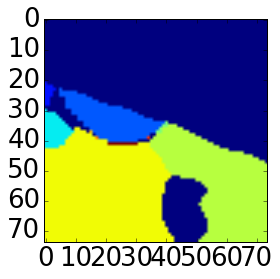

In [65]:
imshow(gold[bbox[0]:bbox[1], bbox[2]:bbox[3]])

array([[  9.99999881e-01,   6.35282760e-08]], dtype=float32)

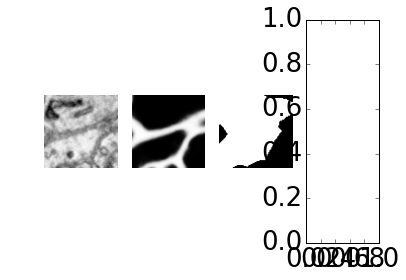

In [101]:
key = 5
correct_split1 = np.array([patches[key]['image'], patches[key]['prob'], patches[key]['merged_array']])
bbox = patches[key]['bbox']
gp.Util.view_rgba(correct_split1)
cnn.predict_proba(correct_split1.reshape(1,3,75,75))


array([[  1.00000000e+00,   5.86670232e-08]], dtype=float32)

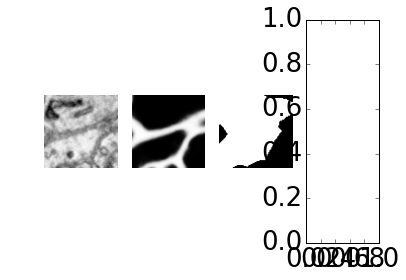

In [75]:
key = 5
correct_split1 = np.array([patches[key]['image'], 1.-patches[key]['prob']*-1., patches[key]['merged_array']])
bbox = patches[key]['bbox']
gp.Util.view_rgba(correct_split1)
cnn.predict_proba(correct_split1.reshape(1,3,75,75))


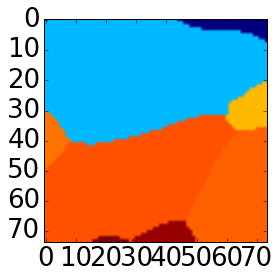

In [67]:
imshow(rhoana[bbox[0]:bbox[1], bbox[2]:bbox[3]])

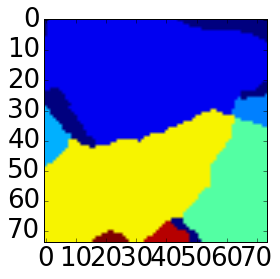

In [68]:
imshow(gold[bbox[0]:bbox[1], bbox[2]:bbox[3]])

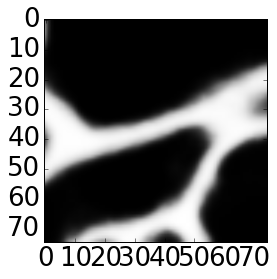

In [73]:
imshow(1.-patches[5]['prob']*-1, cmap='gray')

In [103]:
patches[5]['prob']

array([[ 0.43529412,  0.14901961,  0.03529412, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.47058824,  0.17254902,  0.03529412, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.47058824,  0.17647059,  0.03921569, ...,  0.00392157,
         0.00392157,  0.00392157],
       ..., 
       [ 0.00392157,  0.00392157,  0.00784314, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.00392157,  0.00392157,  0.00784314, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.00392157,  0.00784314,  0.01176471, ...,  0.00392157,
         0.00392157,  0.00392157]], dtype=float32)

In [77]:
prob

array([[-253., -253., -253., ..., -253., -253., -253.],
       [-253., -253., -253., ..., -253., -253., -253.],
       [-253., -253., -253., ..., -253., -253., -253.],
       ..., 
       [  -9.,   -9.,  -11., ..., -253., -253., -253.],
       [  -7.,   -6.,   -7., ..., -253., -253., -253.],
       [  -5.,   -4.,   -5., ..., -253., -253., -253.]])

In [78]:
X_test, y_test = mlp.Patch.load_rgb_test_only('cylinder2_rgb')

Loaded /home/d/patches//cylinder2_rgb/ in 0.0670518875122 seconds.


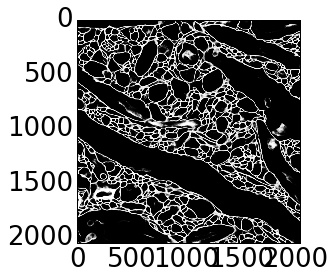

In [91]:
imshow(1. - (prob / 255.), cmap='gray')

In [92]:
1. - (prob / 255.)

array([[ 0.00392157,  0.00392157,  0.00392157, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.00392157,  0.00392157,  0.00392157, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.00392157,  0.00392157,  0.00392157, ...,  0.00392157,
         0.00392157,  0.00392157],
       ..., 
       [ 0.96078431,  0.96078431,  0.95294118, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.96862745,  0.97254902,  0.96862745, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.97647059,  0.98039216,  0.97647059, ...,  0.00392157,
         0.00392157,  0.00392157]])

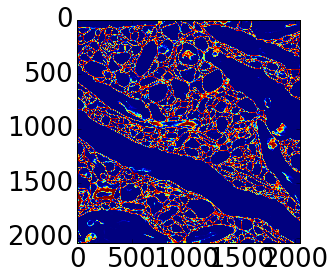

In [95]:
imshow(255. - prob)